In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('fft_data1.csv')
del df['Unnamed: 0']
df.columns

Index(['Amplitude', 'Frequency'], dtype='object')

<AxesSubplot:xlabel='Frequency', ylabel='Amplitude'>

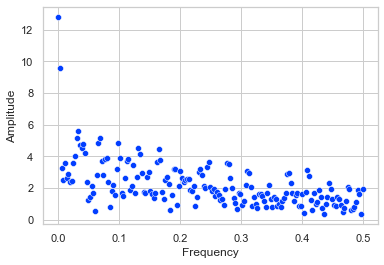

In [13]:
sns.scatterplot(df.Frequency,df.Amplitude)

In [14]:
df

,Amplitude,Frequency
0,12.814013,0.000000
1,9.547197,0.002740
2,3.262728,0.005479
3,2.508010,0.008219
4,3.605442,0.010959
...,...,...
178,1.110596,0.487671
179,1.853265,0.490411
180,1.603199,0.493151
181,0.332881,0.495890


In [15]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(df)
        bic.append(gmm.bic(df))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm10 = gmm

In [17]:
best_gmm10.weights_

array([0.11591102, 0.4910708 , 0.01092897, 0.3820892 ])

In [41]:
x,y=best_gmm10.sample(183)
amp=[]
freq=[]
for i in range(x.shape[0]):
    amp.append(x[i][0])
    freq.append(x[i][1])

<AxesSubplot:>

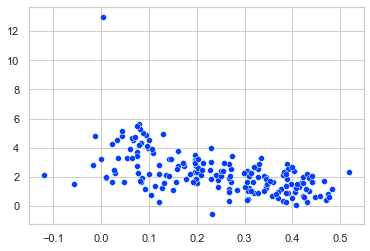

In [42]:
sns.scatterplot(freq,amp)

<AxesSubplot:xlabel='Frequency', ylabel='Amplitude'>

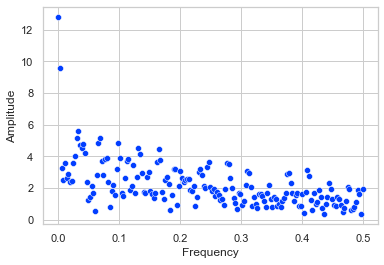

In [43]:
sns.scatterplot(df.Frequency,df.Amplitude)